/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Prediction for input [6,4,4,0.4]: ['versicolor']


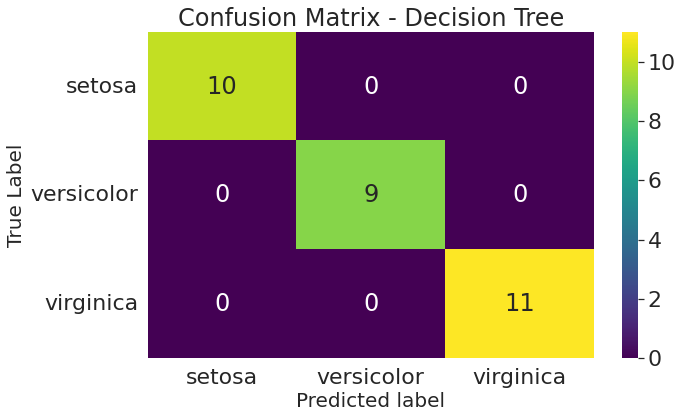

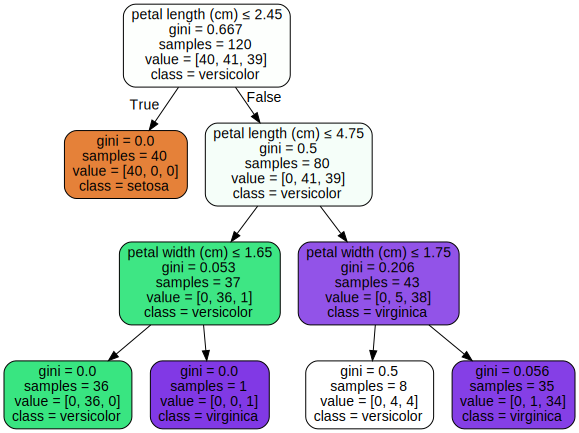

In [14]:
# Program_8h.ipynb: Creating decision trees from a data frame and
# predicting output. Plotting a confusion matrix.
# Run the program in Google Colab.
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
import graphviz
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
  
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["Species"] = data.target
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df["Species"] = df["Species"].replace(targets)
x = df.drop(columns="Species")
y = df["Species"]
feature_names = x.columns
labels = y.unique()
# Create training and testing data.
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = \
train_test_split(x,y,test_size = 0.2,random_state = 42)
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 42)
clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None, \
                                feature_names=data.feature_names,  \
                                class_names=data.target_names,  \
                                filled=True, rounded=True,  \
                                special_characters=True)
DTclf=clf.fit(X_train, y_train)
prediction = DTclf.predict([[6,4,4,0.4]])
print("Prediction for input [6,4,4,0.4]:" , prediction)
graph = graphviz.Source(dot_data)
# Plot a Confusion Matrix.
plt.figure(figsize=(10,6))
test_pred_DT = clf.predict(test_x)
confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_DT)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=2)
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis")
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted label", fontsize =20)
ax.set_xticklabels([""]+labels)
ax.set_ylabel("True Label", fontsize=20)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
# Plot the decision tree.
graph